In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Preprocessing

In [21]:
df = pd.read_csv("mental_health.csv")

# drop rows with missing data
df.dropna(inplace=True) 

# drop strings with foreign characters
df = df[df['statement'].astype(str).apply(lambda x: x.isascii())] 

# drop redundant index column
df = df.drop("Unnamed: 0", axis=1) 

# convert to lowercase
df["statement"] = df["statement"].str.lower() 

df.sample(5, random_state=55).head()

,statement,status
26152,"so i am 12, and have for the past year felt li...",Suicidal
30043,hello i am having a massive anxiety attack ove...,Stress
26837,okay so i am writing this bc i feel like i hav...,Depression
32964,i want to go on a cruise ship.,Normal
10400,nothing makes sense in me anymore. i think i h...,Suicidal


Exploratory Data Analysis

In [22]:
# examine distribution of labels
print(f"Number of observations for each label: \n{df['status'].value_counts()}")

Number of observations for each label: 
status
Normal                  14989
Depression              14855
Suicidal                10342
Anxiety                  2484
Stress                   1824
Bipolar                  1642
Personality disorder      690
Name: count, dtype: int64


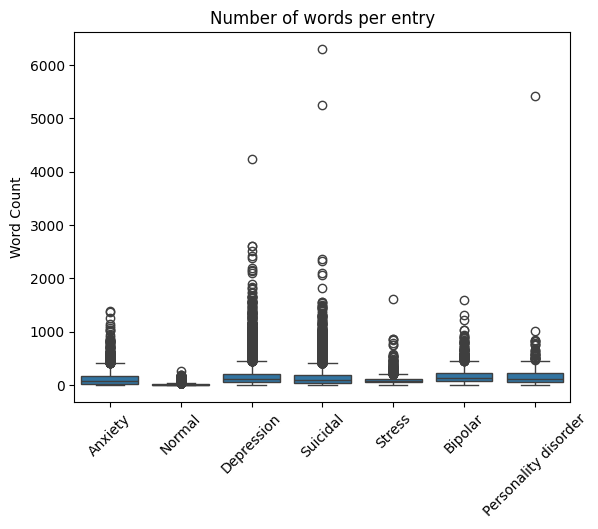

In [23]:
# visualize word count statistics
df['word_count'] = df['statement'].str.split().str.len()
sns.boxplot(x="status", y="word_count", data=df)
plt.title("Number of words per entry")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Word Count")
plt.show()

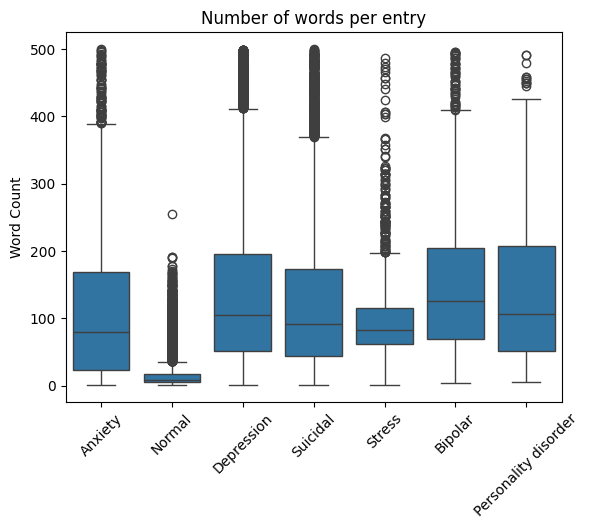

In [24]:
# we drop entries with long word counts and see the difference
df = df[df["word_count"] <= 500]
sns.boxplot(x="status", y="word_count", data=df)
plt.title("Number of words per entry")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Word Count")
plt.show()

Exporting data to train-validation-test sets

In [25]:
# sample 10000 datapoints to be used in model building
df = df.sample(10_000, random_state=55)
df.head()

,statement,status,word_count
8477,i am 25f. i was diagnosed with depression at 1...,Depression,312
27650,"hi everyone, i'm not sure if this goes here or...",Normal,97
47826,i have no definable skillset. i am bad at thin...,Depression,60
18348,my life is the definition of what goes on behi...,Depression,81
14244,does it get better? of course it does not. ove...,Depression,18


In [26]:
# split data into 80% train, 10% validation and 10% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=55)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=55)

# export data into csv files
train_df.to_csv("train.csv", index=False)
val_df.to_csv("validation.csv", index=False)
test_df.to_csv("test.csv", index=False)